# Model Building
Build a basic LSTM to predict for calendar year 2024

In [1]:
from _Setup import *
from tf_model import *

Installing dependencies from requirements.txt...
All dependencies installed successfully.


In [2]:
sector_train = pd.read_csv(sector_data_csv_path_train_pivoted, index_col='Area of Responsibility')

In [3]:
sector_train.head()

,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
Area of Responsibility,,,,,,,,,,,,,,,,,,,,,
Atlanta Field Office,1022.0,762.0,564.0,527.0,521.0,847.0,1037.0,2141.0,1532.0,1428.0,...,1102.0,1206.0,1260.0,1280.0,899.0,1012.0,1150.0,917.0,1172.0,987.0
Baltimore Field Office,443.0,550.0,658.0,698.0,660.0,367.0,85.0,177.0,150.0,116.0,...,1599.0,1614.0,1764.0,1609.0,1304.0,1711.0,1748.0,1591.0,1521.0,1539.0
Big Bend Sector,653.0,526.0,543.0,604.0,562.0,675.0,507.0,628.0,660.0,746.0,...,1200.0,1181.0,1421.0,412.0,404.0,568.0,560.0,479.0,426.0,322.0
Blaine Sector,32.0,24.0,36.0,25.0,27.0,16.0,6.0,13.0,5.0,15.0,...,110.0,174.0,115.0,118.0,158.0,188.0,218.0,229.0,198.0,291.0
Boston Field Office,1395.0,1001.0,1558.0,950.0,1350.0,611.0,292.0,54.0,279.0,208.0,...,4173.0,3115.0,3553.0,4007.0,4482.0,5169.0,5576.0,3446.0,3250.0,4236.0


In [4]:
# Import the scaler
with open(scalers_file, "rb") as file:
    scalers = pickle.load(file)

print(scalers)

{'Atlanta Field Office': MinMaxScaler(), 'Baltimore Field Office': MinMaxScaler(), 'Big Bend Sector': MinMaxScaler(), 'Blaine Sector': MinMaxScaler(), 'Boston Field Office': MinMaxScaler(), 'Buffalo Field Office': MinMaxScaler(), 'Buffalo Sector': MinMaxScaler(), 'Chicago Field Office': MinMaxScaler(), 'Del Rio Sector': MinMaxScaler(), 'Detroit Field Office': MinMaxScaler(), 'Detroit Sector': MinMaxScaler(), 'El Centro Sector': MinMaxScaler(), 'El Paso Field Office': MinMaxScaler(), 'El Paso Sector': MinMaxScaler(), 'Grand Forks Sector': MinMaxScaler(), 'Havre Sector': MinMaxScaler(), 'Houlton Sector': MinMaxScaler(), 'Houston Field Office': MinMaxScaler(), 'Laredo Field Office': MinMaxScaler(), 'Laredo Sector': MinMaxScaler(), 'Los Angeles Field Office': MinMaxScaler(), 'Miami Field Office': MinMaxScaler(), 'Miami Sector': MinMaxScaler(), 'New Orleans Field Office': MinMaxScaler(), 'New Orleans Sector': MinMaxScaler(), 'New York Field Office': MinMaxScaler(), 'Portland Field Office': 

In [5]:
# Ensure scalers work
atlanta_scaler_info = scalers['Atlanta Field Office']
print(atlanta_scaler_info)

# Display the min and max values used for scaling
print("Min values:", atlanta_scaler_info.data_min_)
print("Max values:", atlanta_scaler_info.data_max_)

# Display the feature range
print("Feature range:", atlanta_scaler_info.feature_range)

# Display the scale and min values used for transformation
print("Scale:", atlanta_scaler_info.scale_)
print("Min:", atlanta_scaler_info.min_)

MinMaxScaler()
Min values: [521.]
Max values: [2141.]
Feature range: (0, 1)
Scale: [0.00061728]
Min: [-0.32160494]


In [6]:
# TODO : Create scaled version of original Dataframe
# Apply pre-trained scalers row-wise

# Create an empty DataFrame to store scaled values
sector_train_scaled = pd.DataFrame(index=sector_train.index, columns=sector_train.columns)

# Apply each pre-trained scaler row-wise
for index, row in sector_train.iterrows():
	scaler = scalers[index]
	scaled_row = scaler.transform(row.values.reshape(-1, 1)).flatten()
	sector_train_scaled.loc[index] = scaled_row


In [7]:
# TODO : Basic models here -> ARIMA, STL Decomp, LSTM, Transformer

# Model Building Process for Complex Models

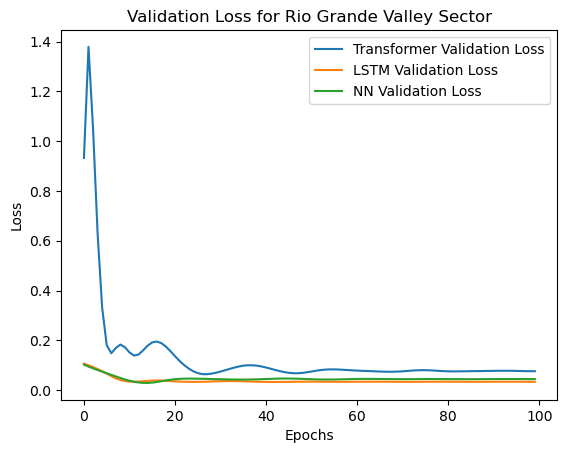

In [8]:
import matplotlib.pyplot as plt

# Convert sector_train_scaled to numeric type
sector_train_scaled = sector_train_scaled.apply(pd.to_numeric)

# Select the data for 'Rio Grande Valley Sector'
index = 'Rio Grande Valley Sector'
i = sector_train.index.get_loc(index)
train_size = int(0.8 * sector_train_scaled.shape[1])  # 80% train, 20% validation
SEQ_LENGTH = 12  # Assuming SEQ_LENGTH is 12, you can adjust this value as needed

# Ensure the indices are within bounds
if train_size - SEQ_LENGTH < 0 or train_size > sector_train_scaled.shape[1]:
	raise ValueError("Invalid train_size or SEQ_LENGTH value")

X_train = sector_train_scaled.iloc[i, :train_size - SEQ_LENGTH].values.reshape(-1, 1)
y_train = sector_train_scaled.iloc[i, train_size - SEQ_LENGTH:train_size].values
X_val = sector_train_scaled.iloc[i, train_size - SEQ_LENGTH:-SEQ_LENGTH].values.reshape(-1, 1)
y_val = sector_train_scaled.iloc[i, -SEQ_LENGTH:].values

# Reshape for TensorFlow (time_steps, features)
X_train = X_train.reshape((1, X_train.shape[0], 1))
y_train = y_train.reshape((1, y_train.shape[0]))
X_val = X_val.reshape((1, X_val.shape[0], 1))
y_val = y_val.reshape((1, y_val.shape[0]))

# Initialize and compile model
model = TimeSeriesTransformer()
model.compile(optimizer='adam', loss='mse')

# Train model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1, verbose=0)

# Initialize and compile LSTM model
lstm_model = TimeSeriesLSTM()
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model and capture the history
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1, verbose=0)

# Initialize and compile NN model
nn_model = TimeSeriesNN()
nn_model.compile(optimizer='adam', loss='mse')

# Train NN model and capture the history
nn_history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1, verbose=0)

# Plot the validation loss for all models
plt.plot(history.history['val_loss'], label='Transformer Validation Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(nn_history.history['val_loss'], label='NN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss for Rio Grande Valley Sector')
plt.legend()
plt.show()


In [10]:
# Split training data into training and validation sets

X_train = sector_train_scaled.iloc[:, :train_size - SEQ_LENGTH]
y_train = sector_train_scaled.iloc[:, train_size - SEQ_LENGTH:train_size]
X_val = sector_train_scaled.iloc[:, SEQ_LENGTH:-SEQ_LENGTH]
y_val = sector_train_scaled.iloc[:, -SEQ_LENGTH:]

# Reshape for TensorFlow (batch, time_steps, features)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.values.reshape((y_train.shape[0], y_train.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
y_val = y_val.values.reshape((y_val.shape[0], y_val.shape[1]))

# Load and preprocess data
sector_train_scaled = sector_train_scaled.astype(float)  # Ensure the DataFrame is of float type
seq_length = 12

train_size = int(0.8 * sector_train_scaled.shape[1])

transformer_models = {}
lstm_models = {}
nn_models = {}

tf_forecasts = {}
lstm_forecasts = {}
nn_forecasts = {}

seq_length = 12  # Define sequence length
train_size = sector_train_scaled.shape[1]  # Use full train set

for i in range(sector_train_scaled.shape[0]):  # Loop over each row separately

    index = sector_train.index[i]

    X_train = sector_train_scaled.iloc[i, :train_size - seq_length].values.reshape(1, -1, 1)
    y_train = sector_train_scaled.iloc[i, train_size - seq_length:train_size].values.reshape(1, -1)
    
    # Initialize and compile NN model
    nn_model = TimeSeriesNN()
    nn_model.compile(optimizer='adam', loss='mse')
    
    # Train NN model
    nn_model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)
    
    # Forecast 12 time steps ahead with NN model
    nn_forecast = nn_model.predict(X_train)
    nn_forecast = scalers[index].inverse_transform(nn_forecast.reshape(-1, 1)).flatten()
    nn_forecasts[index] = nn_forecast

    nn_models[index] = nn_model

    # Initialize and compile Transformer model
    transformer_model = TimeSeriesTransformer()
    transformer_model.compile(optimizer='adam', loss='mse')
    
    # Train Transformer model
    transformer_model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)
    
    # Forecast 12 time steps ahead with Transformer model
    transformer_forecast = transformer_model.predict(X_train)
    transformer_forecast = scalers[index].inverse_transform(transformer_forecast.reshape(-1, 1)).flatten()
    tf_forecasts[index] = transformer_forecast

    transformer_models[index] = transformer_model

    # Initialize and compile LSTM model
    lstm_model = TimeSeriesLSTM()
    lstm_model.compile(optimizer='adam', loss='mse')
    
    # Train LSTM model
    lstm_model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)
    
    # Forecast 12 time steps ahead with LSTM model
    lstm_forecast = lstm_model.predict(X_train)
    lstm_forecast = scalers[index].inverse_transform(lstm_forecast.reshape(-1, 1)).flatten()
    lstm_forecasts[index] = lstm_forecast

    lstm_models[index] = lstm_model

    print("Iteration ", i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Iteration  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Iteration  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Iteration  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Iteration  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Iteration  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Iteration  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Iteration  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━

# Bring in the Test Data

In [11]:
sector_test = pd.read_csv(sector_data_csv_path_test_pivoted, index_col='Area of Responsibility')
sector_test.head()

,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
Area of Responsibility,,,,,,,,,,,,
Atlanta Field Office,1073,954,1054,1047,1073,1009,915,869,951,667,484,470
Baltimore Field Office,1565,1586,1440,1290,1253,1408,1126,1226,1136,1156,1171,950
Big Bend Sector,324,568,436,529,751,215,214,308,349,291,282,503
Blaine Sector,223,235,226,330,266,181,99,66,63,69,58,34
Boston Field Office,4508,3611,4736,4945,4809,4514,3989,3452,3432,2684,2031,2277


In [14]:
# Select the last 39 columns of sector_train_scaled
X_test = sector_train_scaled.iloc[:, seq_length:]

# Reshape X_test to match the input shape expected by the model
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_test_reshaped.shape)


(41, 39, 1)


# ARIMA and ETS Models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_forecasts = {}

for i in range(sector_train.shape[0]):  # Loop over each row separately

    index = sector_train.index[i]
    train_series = sector_train.iloc[i].values  # Use the original data
    
    # Fit ARIMA model
    # TODO : TUNE THIS
    model = ARIMA(train_series, order=(5,1,0))  # Order (p,d,q) can be tuned
    model_fit = model.fit()
    
    # Forecast 12 time steps ahead
    forecast = model_fit.forecast(steps=seq_length)
    arima_forecasts[index] = forecast



Forecasts: {'Atlanta Field Office': array([1029.32757004, 1061.17051379,  985.31196484, 1067.85746742,
       1024.89952511, 1037.68608897, 1049.85813649, 1022.64065388,
       1043.81083347, 1030.99200634, 1034.13810855, 1040.07855431]), 'Baltimore Field Office': array([1667.43941647, 1674.72021554, 1606.51190777, 1588.94838138,
       1597.3478491 , 1637.6400355 , 1640.22383157, 1612.89308406,
       1609.14315734, 1613.70283113, 1625.80423227, 1626.97369378]), 'Big Bend Sector': array([337.84460125, 357.39762483, 371.63951633, 369.41070103,
       351.2240291 , 346.0928354 , 347.88832726, 353.55197319,
       356.15013688, 354.1277842 , 351.88520001, 350.99493229]), 'Blaine Sector': array([296.37326746, 287.00693199, 312.95174404, 305.62450111,
       344.84017236, 345.61382433, 335.30540282, 358.51425833,
       356.21291762, 368.75762786, 371.45601311, 365.78872045]), 'Boston Field Office': array([4163.18900172, 4302.53494618, 4251.21961392, 4102.89116998,
       4091.02520834, 41

c:\Users\Trevo\anaconda3\envs\capstone\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\Users\Trevo\AppData\Local\Temp\ipykernel_36412\193561572.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2019-01-01', periods=len(train_data) + len(true_test_data), freq='M')


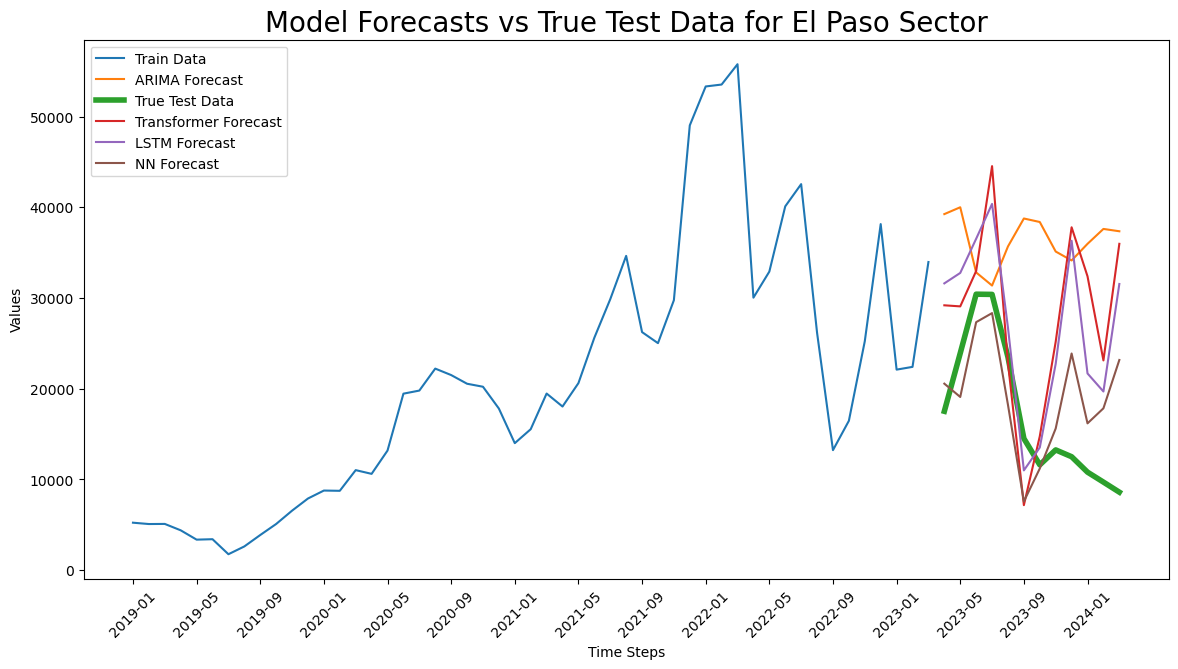

In [49]:
import matplotlib.pyplot as plt

index = "El Paso Sector"

# Extract the ARIMA forecast for 'Rio Grande Valley Sector'
arima_forecast = arima_forecasts[index]

# Extract the train data for 'Rio Grande Valley Sector'
train_data = sector_train.loc[index].values
# Extract the forecasts for 'Rio Grande Valley Sector'
transformer_forecast = tf_forecasts[index]
lstm_forecast = lstm_forecasts[index]
nn_forecast = nn_forecasts[index]

# Extract the true test data for 'Rio Grande Valley Sector'
true_test_data = sector_test.loc[index].values

# Plot the train data
plt.figure(figsize=(14, 7))
plt.plot(range(len(train_data)), train_data, label='Train Data')

# Plot the ARIMA forecast
plt.plot(range(len(train_data), len(train_data) + len(arima_forecast)), arima_forecast, label='ARIMA Forecast')

# Plot the true test data
plt.plot(range(len(train_data), len(train_data) + len(true_test_data)), true_test_data, label='True Test Data', linewidth=4)
# Plot the Transformer forecast
plt.plot(range(len(train_data), len(train_data) + len(transformer_forecast)), transformer_forecast, label='Transformer Forecast')

# Plot the LSTM forecast
plt.plot(range(len(train_data), len(train_data) + len(lstm_forecast)), lstm_forecast, label='LSTM Forecast')

# Plot the Neural Network forecast
plt.plot(range(len(train_data), len(train_data) + len(nn_forecast[:12])), nn_forecast[:12], label='NN Forecast')


plt.xlabel('Time Steps')
# Generate date range for the X-axis
date_range = pd.date_range(start='2019-01-01', periods=len(train_data) + len(true_test_data), freq='M')
plt.xticks(ticks=range(0, len(date_range), 4), labels=date_range.strftime('%Y-%m')[::4], rotation=45)
plt.ylabel('Values')
plt.title('Model Forecasts vs True Test Data for El Paso Sector', size=20)
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize a dictionary to store RMSE values
rmse_values = {}

# Loop over each sector in the arima_forecasts
for sector in arima_forecasts.keys():
    # Get the ARIMA forecast and true test data for the sector
    arima_forecast = arima_forecasts[sector]
    true_test_data = sector_test.loc[sector].values
    
    # Calculate the RMSE for the ARIMA model
    rmse_arima = np.sqrt(mean_squared_error(true_test_data, arima_forecast))
    
    # Store the RMSE value in the dictionary
    rmse_values[sector] = {'ARIMA': rmse_arima}

    # Get the Transformer forecast and calculate RMSE
    transformer_forecast = tf_forecasts[sector][:seq_length]
    rmse_transformer = np.sqrt(mean_squared_error(true_test_data, transformer_forecast))
    rmse_values[sector]['Transformer'] = rmse_transformer

    # Get the LSTM forecast and calculate RMSE
    lstm_forecast = lstm_forecasts[sector][:seq_length]
    rmse_lstm = np.sqrt(mean_squared_error(true_test_data, lstm_forecast))
    rmse_values[sector]['LSTM'] = rmse_lstm

    # Get the Neural Network forecast and calculate RMSE
    nn_forecast = nn_forecasts[sector][:seq_length]
    rmse_nn = np.sqrt(mean_squared_error(true_test_data, nn_forecast))
    rmse_values[sector]['NN'] = rmse_nn

# Print the RMSE values
for sector, rmses in rmse_values.items():
    print(f"RMSE for {sector}:")
    for model, rmse in rmses.items():
        print(f"  {model}: {rmse}")

# Calculate the sum of RMSE values for each model
total_rmse_arima = sum(rmses['ARIMA'] for rmses in rmse_values.values())
total_rmse_transformer = sum(rmses['Transformer'] for rmses in rmse_values.values())
total_rmse_lstm = sum(rmses['LSTM'] for rmses in rmse_values.values())
total_rmse_nn = sum(rmses['NN'] for rmses in rmse_values.values())

print(f"Total RMSE for ARIMA: {total_rmse_arima}")
print(f"Total RMSE for Transformer: {total_rmse_transformer}")
print(f"Total RMSE for LSTM: {total_rmse_lstm}")
print(f"Total RMSE for NN: {total_rmse_nn}")

RMSE for Atlanta Field Office:
  ARIMA: 263.3470655531052
  Transformer: 273.44739267818954
  LSTM: 274.71672910472705
  NN: 227.93806553261348
RMSE for Baltimore Field Office:
  ARIMA: 389.3777574658194
  Transformer: 456.68508364626933
  LSTM: 400.8263534562068
  NN: 209.78734582607694
RMSE for Big Bend Sector:
  ARIMA: 158.95203622454585
  Transformer: 827.2731939933749
  LSTM: 446.59624172735715
  NN: 288.93592499029955
RMSE for Blaine Sector:
  ARIMA: 218.92318372159798
  Transformer: 148.63009873508125
  LSTM: 144.17794317049677
  NN: 149.51104552632557
RMSE for Boston Field Office:
  ARIMA: 1052.825665871137
  Transformer: 1496.4196436828809
  LSTM: 1554.343591359388
  NN: 1501.9306741657551
RMSE for Buffalo Field Office:
  ARIMA: 843.7560060111851
  Transformer: 1719.593338554206
  LSTM: 1913.3893357077122
  NN: 954.6140908765175
RMSE for Buffalo Sector:
  ARIMA: 18.476892470801246
  Transformer: 20.358866101899636
  LSTM: 20.14732345335192
  NN: 16.04021074037692
RMSE for Chic

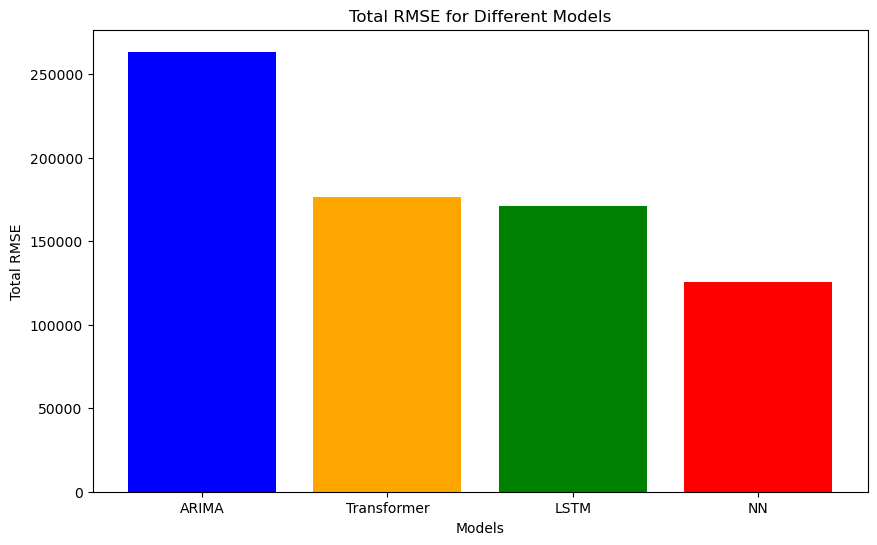

In [34]:
import matplotlib.pyplot as plt

# Define the models and their corresponding total RMSE values
models = ['ARIMA', 'Transformer', 'LSTM', 'NN']
total_rmse_values = [total_rmse_arima, total_rmse_transformer, total_rmse_lstm, total_rmse_nn]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, total_rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Total RMSE')
plt.title('Total RMSE for Different Models')
plt.show()

C:\Users\Trevo\AppData\Local\Temp\ipykernel_36412\1540081387.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2024-01-01', periods=seq_length, freq='M')


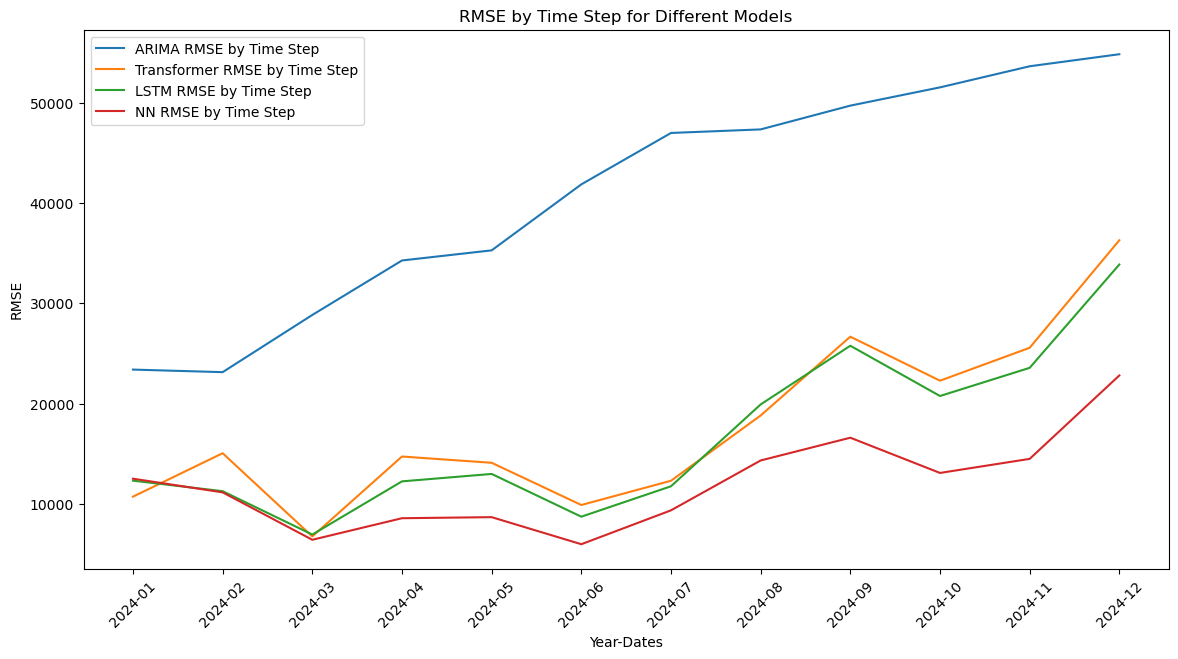

In [43]:
import matplotlib.pyplot as plt

# Define the regions of interest
regions_of_interest = [
    'San Diego Sector', 'El Centro Sector', 'Yuma Sector', 'Tucson Sector',
    'El Paso Sector', 'Marfa Sector', 'Del Rio Sector', 'Laredo Sector', 'Rio Grande Valley Sector'
]

# Initialize a dictionary to store RMSE values for the regions of interest
rmse_values_interest = {region: rmse_values[region] for region in regions_of_interest if region in rmse_values}

# Initialize a dictionary to store the RMSE values by time step for each model
rmse_by_time_step = {'ARIMA': np.zeros(seq_length), 'Transformer': np.zeros(seq_length), 'LSTM': np.zeros(seq_length), 'NN': np.zeros(seq_length)}

# Calculate the RMSE by time step for each model
for region, rmses in rmse_values_interest.items():
    true_test_data = sector_test.loc[region].values
    for model in rmse_by_time_step.keys():
        forecast = tf_forecasts[region][:seq_length] if model == 'Transformer' else lstm_forecasts[region][:seq_length] if model == 'LSTM' else nn_forecasts[region][:seq_length] if model == 'NN' else arima_forecasts[region]
        rmse_by_time_step[model] += (forecast - true_test_data) ** 2

# Calculate the mean RMSE by time step
for model in rmse_by_time_step.keys():
    rmse_by_time_step[model] = np.sqrt(rmse_by_time_step[model] / len(regions_of_interest))

# Plot the RMSE by time step for each model
plt.figure(figsize=(14, 7))
for model, rmse in rmse_by_time_step.items():
    plt.plot(range(seq_length), rmse, label=f'{model} RMSE by Time Step')

# Generate date range for the X-axis
date_range = pd.date_range(start='2024-01-01', periods=seq_length, freq='M')
plt.xticks(ticks=range(seq_length), labels=date_range.strftime('%Y-%m'), rotation=45)

plt.xlabel('Year-Dates')
plt.ylabel('RMSE')
plt.title('RMSE by Time Step for Different Models')
plt.legend()
plt.show()

In [41]:
# Define the sectors of interest
sectors_of_interest = [
    'Blaine Sector', 'Spokane Sector', 'Havre Sector', 'Grand Forks Sector',
    'Detroit Sector', 'Buffalo Sector', 'Swanton Sector', 'Houlton Sector'
]

# Initialize a dictionary to store RMSE values for the sectors of interest
rmse_values_sectors = {sector: rmse_values[sector] for sector in sectors_of_interest if sector in rmse_values}

# Initialize a dictionary to store the RMSE values by time step for each model
rmse_by_time_step_sectors = {'ARIMA': np.zeros(seq_length), 'Transformer': np.zeros(seq_length), 'LSTM': np.zeros(seq_length), 'NN': np.zeros(seq_length)}

# Calculate the RMSE by time step for each model
for sector, rmses in rmse_values_sectors.items():
    true_test_data = sector_test.loc[sector].values
    for model in rmse_by_time_step_sectors.keys():
        forecast = tf_forecasts[sector][:seq_length] if model == 'Transformer' else lstm_forecasts[sector][:seq_length] if model == 'LSTM' else nn_forecasts[sector][:seq_length] if model == 'NN' else arima_forecasts[sector]
        rmse_by_time_step_sectors[model] += (forecast - true_test_data) ** 2

# Calculate the mean RMSE by time step
for model in rmse_by_time_step_sectors.keys():
    rmse_by_time_step_sectors[model] = np.sqrt(rmse_by_time_step_sectors[model] / len(sectors_of_interest))

# Calculate the average of the averages for each model
average_rmse_sectors = {model: np.mean(rmse) for model, rmse in rmse_by_time_step_sectors.items()}

# Print the average RMSE for each model
for model, avg_rmse in average_rmse_sectors.items():
    print(f"Average RMSE for {model}: {avg_rmse}")

Average RMSE for ARIMA: 338.1634492887368
Average RMSE for Transformer: 356.249369438609
Average RMSE for LSTM: 355.22829341567075
Average RMSE for NN: 410.32120390583265
